## **Problem Statement**

Provide the level of education of the group with the highest number of “No second Crime”.
2. Provide the number of offenders with high school degrees who were convicted of driving with
Blood Alcohol Concentration (BAC) of 0.15 or higher in their second conviction.
3. Provide the min, max and average age of the sample.
4. Provide the number of married females aged 30-39 who were convicted of registering BAC of
0.15 or higher in their second conviction.
5. Provide the number of unmarried females convicted of registering a BAC of 0.10 to 0.11 in
their second crime.
6. Identify areas that require further research/investigation.
7. Identify policies or countermeasures to curb re-offending that you would recommend based
on the knowledge gleaned from this data set.

**Data Dictionary**

Name - Name of the person
<br>
Net worth in billions - Net worth of the person in billions
<br>
Country - Country where the person is from
<br>
Source - Source of the income
<br>
Rank - Rank of the person in the Billionaires list
<br>
Age - Age of the person
<br>
Industry - Industry to which the person is related to

In [1]:
# importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [3]:
df = pd.read_excel('transportdata.xls') #loading dataset

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [4]:
df.head()

,age,agecat,marital,social,ed,employ,gender,crime1,time,crime2
0,22,22-29,Unmarried,Lower class,Did not complete high school,Yes,Male,BAC 0.08,74,BAC 0.12 to 0.14
1,19,18-21,Unmarried,Lower class,High school degree,No,Female,BAC 0.09,239,BAC 0.10 to 0.11
2,28,22-29,Unmarried,Upper class,Did not complete high school,No,Male,BAC 0.08,208,BAC 0.08
3,36,30-39,Married,Upper class,High school degree,Yes,Male,BAC 0.08,9999,No second crime
4,27,22-29,Married,Middle class,High school degree,No,Male,BAC 0.08,9999,No second crime


In [5]:
df.shape

(1000, 10)

In [6]:
df.info() #The Datatypes of the columns in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   age      1000 non-null   int64 
 1   agecat   1000 non-null   object
 2   marital  1000 non-null   object
 3   social   1000 non-null   object
 4   ed       1000 non-null   object
 5   employ   1000 non-null   object
 6   gender   1000 non-null   object
 7   crime1   1000 non-null   object
 8   time     1000 non-null   int64 
 9   crime2   1000 non-null   object
dtypes: int64(2), object(8)
memory usage: 78.2+ KB


In [7]:
df.isnull().sum().sum() #Checking for missing values

0

In [8]:
df.isnull().sum()

age        0
agecat     0
marital    0
social     0
ed         0
employ     0
gender     0
crime1     0
time       0
crime2     0
dtype: int64

### Plots & Its use

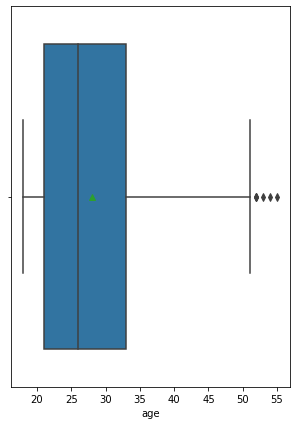

In [10]:
plt.figure(figsize=(5,7)) #Boxplot - helps in checking for Outliers
sns.boxplot(x = 'age', data = df, showmeans=True)
plt.show() 

#Provide the min, max and average age of the sample.

In [13]:
df[['age']].describe()

,age
count,1000.000000
mean,28.074000
std,8.078601
min,18.000000
25%,21.000000
50%,26.000000
75%,33.000000
max,55.000000


#### Distribution of Age variable


mean = 28 
minimum = 18
maximum = 55

#### distplot

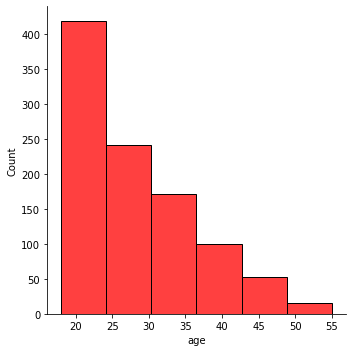

In [12]:
sns.displot(df["age"],kde = False, color = 'red',bins=6)
plt.show()

#Provide the level of education of the group with the highest number of “No second Crime”.

In [19]:
df.crime2.value_counts()

No second crime       353
BAC 0.08              187
BAC 0.09              155
BAC 0.10 to 0.11      135
BAC 0.12 to 0.14       97
BAC 0.15 or higher     73
Name: crime2, dtype: int64

In [26]:
classwithnosecondcrime=df[df['crime2']=='No second crime']['ed'].value_counts()
classwithnosecondcrime

Did not complete high school    146
High school degree              140
College degree                   54
Post-undergraduate degree        13
Name: ed, dtype: int64

In [22]:
nosecondcrime=df[df['crime2']=='No second crime']

In [28]:
nosecondcrime['ed'].value_counts()

Did not complete high school    146
High school degree              140
College degree                   54
Post-undergraduate degree        13
Name: ed, dtype: int64

#Provide the number of offenders with high school degrees who were convicted of driving with Blood Alcohol Concentration (BAC) of 0.15 or higher in their second conviction.

In [31]:
offwithhighschooldegree= df[df['ed']=='High school degree']
offwithhighschooldegree

,age,agecat,marital,social,ed,employ,gender,crime1,time,crime2
1,19,18-21,Unmarried,Lower class,High school degree,No,Female,BAC 0.09,239,BAC 0.10 to 0.11
3,36,30-39,Married,Upper class,High school degree,Yes,Male,BAC 0.08,9999,No second crime
4,27,22-29,Married,Middle class,High school degree,No,Male,BAC 0.08,9999,No second crime
5,29,22-29,Married,Middle class,High school degree,Yes,Male,BAC 0.15 or higher,287,BAC 0.10 to 0.11
6,24,22-29,Unmarried,Lower class,High school degree,Yes,Male,BAC 0.10 to 0.11,528,BAC 0.08
...,...,...,...,...,...,...,...,...,...,...
973,32,30-39,Married,Lower class,High school degree,Yes,Male,BAC 0.08,9999,No second crime
993,19,18-21,Married,Middle class,High school degree,No,Male,BAC 0.09,327,BAC 0.08
995,33,30-39,Unmarried,Lower class,High school degree,No,Male,BAC 0.08,9999,No second crime
997,20,18-21,Unmarried,Upper class,High school degree,Yes,Male,BAC 0.15 or higher,384,BAC 0.15 or higher


In [34]:
offwithhighschooldegree['crime2'].value_counts()

No second crime       140
BAC 0.08               72
BAC 0.09               66
BAC 0.10 to 0.11       52
BAC 0.12 to 0.14       37
BAC 0.15 or higher     35
Name: crime2, dtype: int64

In [35]:
#Provide the number of married females aged 30-39 who were convicted of registering BAC of
#0.15 or higher in their second conviction.

In [51]:
marriedfem=df[(df['marital']=='Married')& (df['gender']=='Female') & (df['agecat']=='30-39') & (df['crime2']=='BAC 0.15 or higher')]
marriedfem['crime2'].value_counts()

BAC 0.15 or higher    2
Name: crime2, dtype: int64

In [52]:
#Provide the number of unmarried females convicted of registering a BAC of 0.10 to 0.11 in their second crime.

In [54]:
unmarriedfem=df[(df['marital']=='Unmarried')& (df['gender']=='Female')  & (df['crime2']=='BAC 0.10 to 0.11')]
unmarriedfem

,age,agecat,marital,social,ed,employ,gender,crime1,time,crime2
1,19,18-21,Unmarried,Lower class,High school degree,No,Female,BAC 0.09,239,BAC 0.10 to 0.11
24,24,22-29,Unmarried,Lower class,Did not complete high school,No,Female,BAC 0.12 to 0.14,708,BAC 0.10 to 0.11
43,22,22-29,Unmarried,Upper class,Did not complete high school,Yes,Female,BAC 0.08,449,BAC 0.10 to 0.11
127,44,40+,Unmarried,Lower class,High school degree,Yes,Female,BAC 0.09,155,BAC 0.10 to 0.11
219,28,22-29,Unmarried,Lower class,High school degree,Yes,Female,BAC 0.12 to 0.14,70,BAC 0.10 to 0.11
222,20,18-21,Unmarried,Middle class,Did not complete high school,No,Female,BAC 0.09,314,BAC 0.10 to 0.11
236,28,22-29,Unmarried,Lower class,Did not complete high school,Yes,Female,BAC 0.12 to 0.14,496,BAC 0.10 to 0.11
500,27,22-29,Unmarried,Lower class,High school degree,Yes,Female,BAC 0.08,677,BAC 0.10 to 0.11
520,22,22-29,Unmarried,Lower class,Did not complete high school,Yes,Female,BAC 0.08,532,BAC 0.10 to 0.11
935,19,18-21,Unmarried,Lower class,High school degree,Yes,Female,BAC 0.09,126,BAC 0.10 to 0.11


In [55]:
unmarriedfem.crime2.value_counts()

BAC 0.10 to 0.11    10
Name: crime2, dtype: int64

#### Pieplot

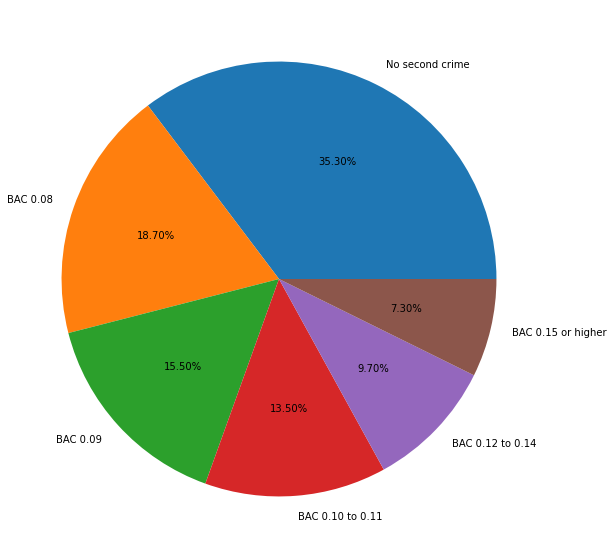

In [61]:
plt.figure(figsize=(11,10))
plt.pie(df["crime2"].value_counts(), labels=df["crime2"].value_counts().index, autopct='%.2f%%') 
        #explode = (0.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0))
# autopct="%.2f%%" is used here display the percentage in the pie-chart upto 1 deciaml place
# explode is used here to take the 'Finance & Investment'(30%) of the pie-chart
plt.show()